In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [6]:
train_dir='/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/dogvscat/train'
test_dir='/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/dogvscat/test'

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [12]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,
                              validation_data=test_generator,validation_steps=test_generator.samples//20)

<ipython-input-12-db9fc7c3c0ec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,epochs=10,


Epoch 1/10
25/25 [==============================] - 79s 3s/step - loss: 0.7371 - accuracy: 0.5160 - val_loss: 0.6917 - val_accuracy: 0.5250
Epoch 2/10
25/25 [==============================] - 12s 486ms/step - loss: 0.6937 - accuracy: 0.4900 - val_loss: 0.7720 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 13s 505ms/step - loss: 0.7140 - accuracy: 0.4880 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 12s 481ms/step - loss: 0.6938 - accuracy: 0.5300 - val_loss: 0.6922 - val_accuracy: 0.4500
Epoch 5/10
25/25 [==============================] - 12s 497ms/step - loss: 0.7055 - accuracy: 0.5420 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 6/10
25/25 [==============================] - 12s 486ms/step - loss: 0.6830 - accuracy: 0.5700 - val_loss: 0.6650 - val_accuracy: 0.6750
Epoch 7/10
25/25 [==============================] - 12s 466ms/step - loss: 0.6733 - accuracy: 0.6120 - val_loss: 0.6630 - val_accuracy: 0.6250
Ep

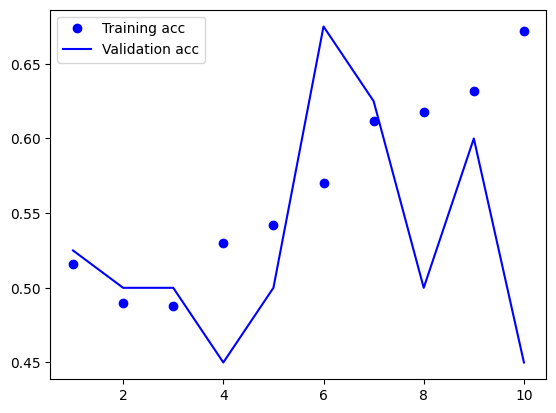

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

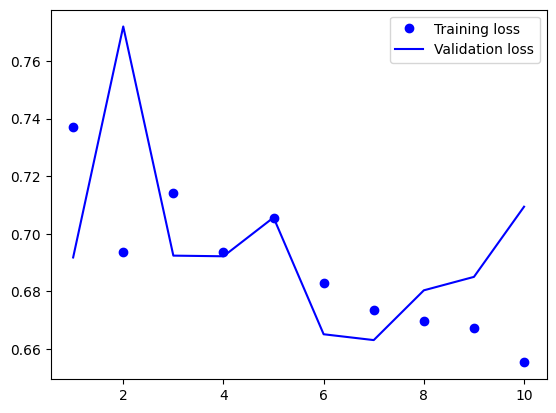

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [18]:
model.save('catvsdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


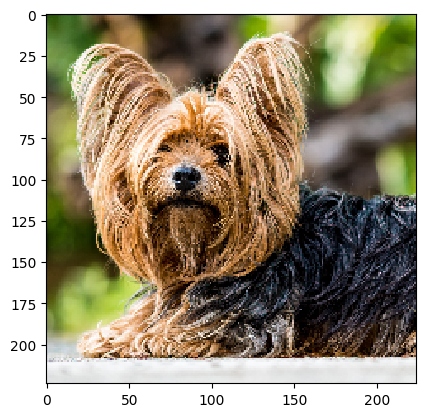

In [27]:
from tensorflow.keras.preprocessing import image
path ='/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/dogvscat/train/1/1.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [28]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [29]:
img_array=img_array.reshape(1,224,224,3)

In [30]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 104ms/step
dog
